<a href="https://colab.research.google.com/github/AryanGKulkarni/Math-Equation-solver/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
print("Loading...")

# common libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join

# CV and Image
import cv2
from PIL import Image

# pickle
import pickle

# keras
import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
K.image_data_format()

print("Done")

Loading...
Done


In [212]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [213]:
from joblib import Parallel, delayed
import joblib
from sklearn.tree import BaseDecisionTree

# Load the model from the file
model = joblib.load('model1.pkl')

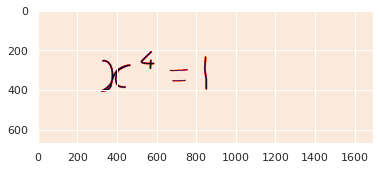

In [214]:
img = cv2.imread('/content/image2.png',cv2.IMREAD_GRAYSCALE)     #image path goes here
plt.imshow(img)

In [215]:
if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    #print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    #print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    #print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

In [216]:
for digit in train_data:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    #print ("\n\n---------------------------------------\n\n")
    #print ("=========PREDICTION============ \n\n")
    #plt.imshow(digit.reshape(28, 28), cmap="gray")
    #plt.show()
    #print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    #print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    #print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    #print ("\n\n---------------------------------------\n\n")

In [217]:
equation=''

for i in range(len(train_data)):
    
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
        
    for j in range(10) :
        if result[0] == j :
            equation = equation + str(j)
    
    if result[0] == 10 :
        equation = equation + "+"
    if result[0] == 11 :
        equation = equation + "-"
    if result[0] == 12 :
        equation = equation + "*"
    if result[0] == 13 :
        equation = equation + "/"
    if result[0] == 14 :
        equation = equation + "="
    if result[0] == 15 :
        equation = equation + "."
    if result[0] == 16 :
        equation = equation + "x"
    if result[0] == 17 :
        equation = equation + "y"      
    if result[0] == 18 :
        equation = equation + "z"

    s=equation
t=""
i=0
while i<len(s):
    if s[i]=="-" and s[i+1]=="-":
        t=t+"="
        i=i+2
    else: 
        t=t+s[i]
        i=i+1

equation=t
    
#print("Your Equation :", equation)

In [218]:
import sympy as sp
def lsttostr(lst):
    str = ""
    for i in lst:
        str += i
    return str

In [219]:
equation = list(equation)
temp2 = 0
for i in equation:
    if i == '=':
        equation[temp2] = '-('
        equation += ')'
    temp2 += 1
equation = lsttostr(equation)
#print(equation)

In [220]:
alpha = 'abcdefghijklmnopqrstuvwxyz'
#equation = list(equation)

temp = 0

for i in equation:
    if i in alpha:
        var = i
        #equation[equation.index(i)] = 'a'
        temp = 1
#equation = lsttostr(equation)
#print(equation)

In [221]:
x = sp.symbols(var)
#eq_raw = eval(equation)
#print(eq_raw)
print("Your Equation:")      

if temp != 0:
    s=equation
    t=""
    i=0
    while i<len(s):
        if (s[i] in '123456789') and (s[i+1]==var):
            t=t+s[i]+"*"+s[i+1]
            i=i+2        
        else: 
            t=t+s[i]
            i=i+1
    
    s=equation
    t=""
    i=0
    while i<len(s):       
        if (s[i]==var) and (s[i+1] in '123456789'):
            t=t+s[i]+"**"+s[i+1]
            i=i+2
        else: 
            t=t+s[i]
            i=i+1       

    equation=t    
    eq_raw = eval(equation)    
    display(sp.Eq(eq_raw,0))
    eq = sp.Eq(eq_raw, 0)
    print("Solution:", sp.solve(eq_raw, x))
    #display(sp.solve(eq_raw, x))
else:    
    eq_raw = eval(equation)
    display(equation)
    print("Solution:", eq_raw)

Your Equation:


Eq(x**4 - 1, 0)

Solution: [-1, 1, -I, I]
